In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
import pdb

from utils import *

In [2]:
CH = 23
device = torch.device('cuda')
val_dates = ['180330','180331']
test_dates = ['180328','180329']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
save_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/Goose_ANN_models/'
model_name = 'MLP_1_ch_Drop_03'


train_files, val_files, test_files = create_files(load_path, val_dates, test_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128,CH=CH)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(446, 49, 21)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180324, rec:003, time:1739.0, label:1.0
date:180323, rec:002, time:690.0, label:1.0
date:180411, rec:006, time:5522.0, label:0.0


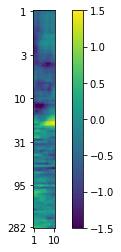

date:180322, rec:007, time:4940.0, label:0.0


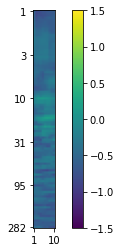

date:180322, rec:005, time:2075.0, label:1.0
date:180412, rec:002, time:2017.0, label:1.0
date:180409, rec:006, time:1909.0, label:1.0
date:180414, rec:005, time:5559.0, label:1.0
date:180413, rec:001, time:6267.0, label:0.0


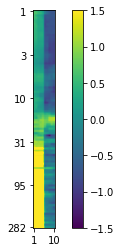

date:180325, rec:007, time:5823.0, label:0.0


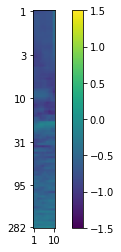

date:180412, rec:001, time:4958.0, label:1.0
date:180410, rec:003, time:3290.0, label:1.0
date:180411, rec:002, time:600.0, label:1.0
date:180411, rec:005, time:2080.0, label:1.0
date:180413, rec:002, time:1630.0, label:0.0


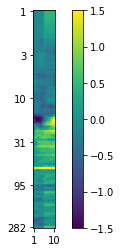

date:180411, rec:006, time:751.0, label:1.0
date:180412, rec:006, time:6358.0, label:0.0


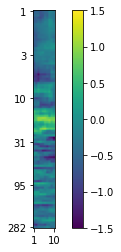

date:180413, rec:003, time:2514.0, label:0.0


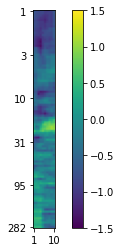

date:180324, rec:005, time:2120.0, label:1.0
date:180413, rec:002, time:1900.0, label:0.0


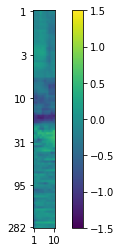

date:180324, rec:008, time:6184.0, label:0.0


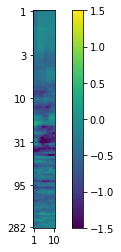

date:180324, rec:003, time:1669.0, label:1.0
date:180413, rec:002, time:6951.0, label:0.0


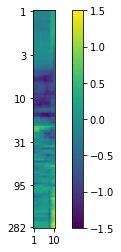

date:180401, rec:001, time:260.0, label:0.0


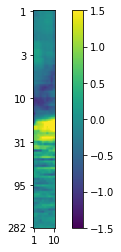

date:180413, rec:001, time:7027.0, label:0.0


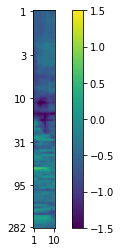

date:180327, rec:008, time:70.0, label:0.0


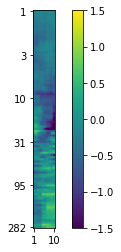

date:180322, rec:005, time:1925.0, label:1.0
date:180413, rec:006, time:740.0, label:1.0
date:180413, rec:001, time:2170.0, label:0.0


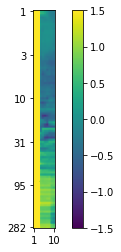

date:180412, rec:001, time:2060.0, label:1.0
date:180413, rec:002, time:120.0, label:0.0


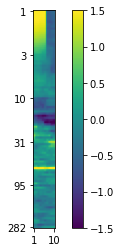

date:180327, rec:005, time:3620.0, label:1.0
date:180324, rec:001, time:858.0, label:0.0


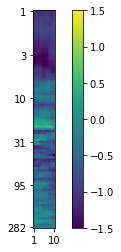

date:180323, rec:005, time:4581.0, label:1.0
date:180413, rec:001, time:5646.0, label:0.0


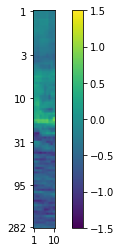

date:180414, rec:002, time:6120.0, label:1.0
date:180327, rec:007, time:2700.0, label:0.0


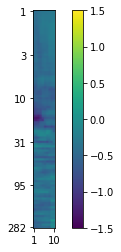

date:180325, rec:009, time:6029.0, label:1.0
date:180322, rec:007, time:1797.0, label:0.0


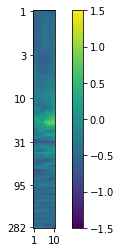

date:180413, rec:004, time:220.0, label:0.0


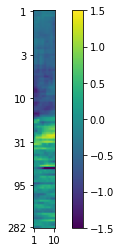

date:180411, rec:006, time:6974.0, label:0.0


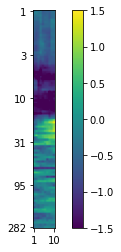

date:180325, rec:004, time:6397.0, label:1.0
date:180413, rec:007, time:7078.0, label:1.0
date:180412, rec:002, time:2377.0, label:1.0
date:180414, rec:004, time:6235.0, label:1.0
date:180327, rec:007, time:1350.0, label:0.0


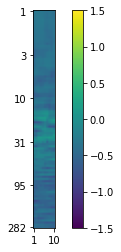

date:180411, rec:006, time:6724.0, label:0.0


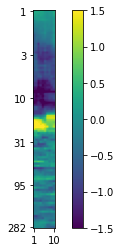

date:180414, rec:007, time:3377.0, label:0.0


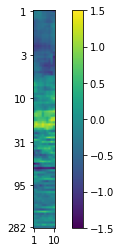

date:180327, rec:001, time:6892.0, label:0.0


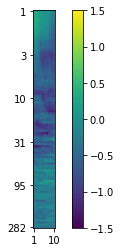

date:180412, rec:001, time:6048.0, label:0.0


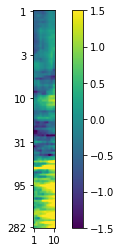

date:180411, rec:003, time:2633.0, label:1.0
date:180324, rec:001, time:898.0, label:0.0


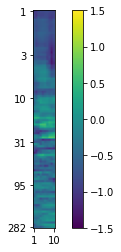

date:180324, rec:001, time:2647.0, label:0.0


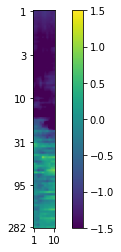

date:180322, rec:007, time:3469.0, label:0.0


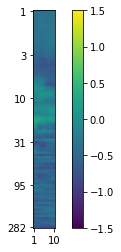

date:180324, rec:009, time:680.0, label:0.0


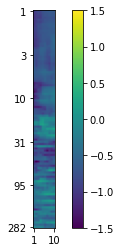

date:180327, rec:004, time:2194.0, label:0.0


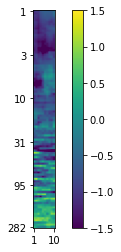

date:180413, rec:001, time:3330.0, label:0.0


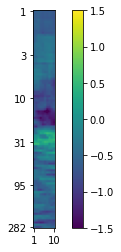

date:180327, rec:007, time:2740.0, label:0.0


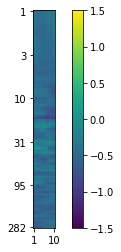

date:180410, rec:006, time:560.0, label:1.0
date:180322, rec:005, time:410.0, label:1.0
date:180414, rec:007, time:4247.0, label:0.0


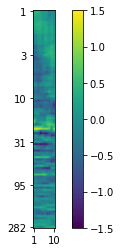

date:180409, rec:006, time:6478.0, label:0.0


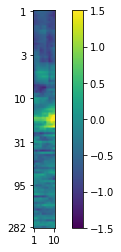

date:180412, rec:005, time:4269.0, label:0.0


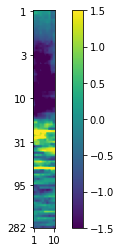

date:180327, rec:001, time:270.0, label:0.0


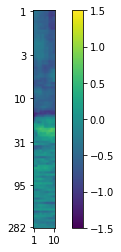

date:180325, rec:007, time:4673.0, label:0.0


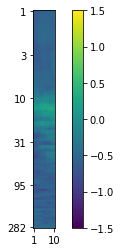

date:180327, rec:007, time:6571.0, label:0.0


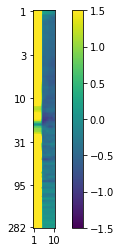

date:180324, rec:001, time:898.0, label:0.0


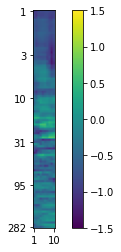

date:180324, rec:008, time:2738.0, label:0.0


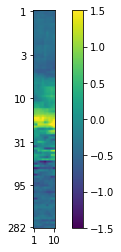

date:180324, rec:008, time:6094.0, label:0.0


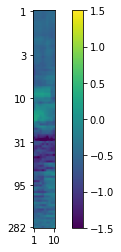

date:180413, rec:002, time:6891.0, label:0.0


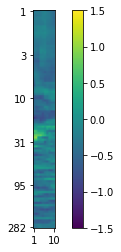

date:180327, rec:007, time:1320.0, label:0.0


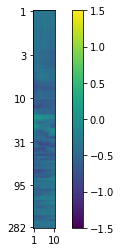

date:180326, rec:003, time:1169.0, label:1.0
date:180414, rec:004, time:5695.0, label:1.0
date:180413, rec:001, time:6347.0, label:0.0


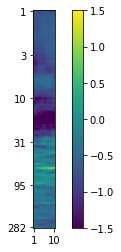

date:180410, rec:006, time:2740.0, label:1.0
date:180401, rec:002, time:2556.0, label:1.0
date:180324, rec:001, time:2905.0, label:1.0
date:180411, rec:004, time:2993.0, label:1.0
date:180413, rec:004, time:240.0, label:0.0


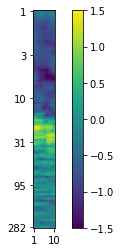

date:180409, rec:006, time:5618.0, label:0.0


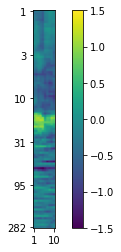

date:180325, rec:006, time:2212.0, label:1.0
date:180323, rec:001, time:6993.0, label:1.0
date:180414, rec:007, time:5908.0, label:0.0


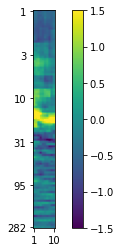

date:180413, rec:001, time:4682.0, label:0.0


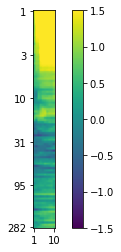

date:180325, rec:001, time:5824.0, label:1.0
date:180414, rec:007, time:4678.0, label:0.0


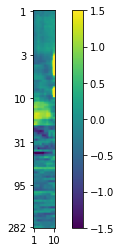

date:180327, rec:005, time:3280.0, label:1.0
date:180413, rec:007, time:1051.0, label:1.0
date:180413, rec:005, time:2028.0, label:1.0
date:180327, rec:007, time:4791.0, label:0.0


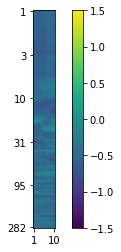

date:180413, rec:002, time:1300.0, label:0.0


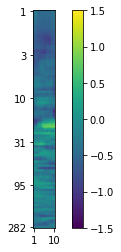

date:180325, rec:003, time:2725.0, label:1.0
date:180413, rec:007, time:4636.0, label:1.0
date:180411, rec:005, time:1790.0, label:1.0
date:180413, rec:007, time:1151.0, label:1.0
date:180325, rec:009, time:590.0, label:0.0


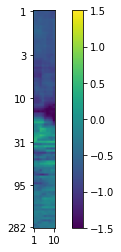

date:180327, rec:007, time:6751.0, label:0.0


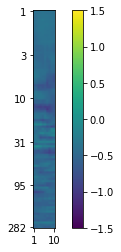

date:180327, rec:005, time:2610.0, label:1.0
date:180413, rec:006, time:5854.0, label:1.0
date:180413, rec:003, time:6201.0, label:0.0


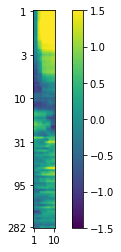

date:180324, rec:001, time:2427.0, label:0.0


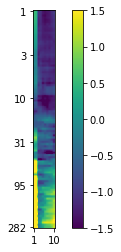

date:180327, rec:008, time:2622.0, label:0.0


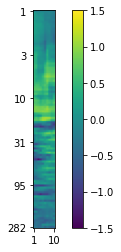

date:180327, rec:008, time:2162.0, label:0.0


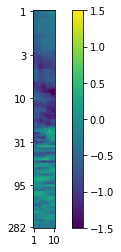

date:180413, rec:001, time:220.0, label:0.0


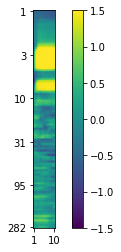

date:180413, rec:001, time:2760.0, label:0.0


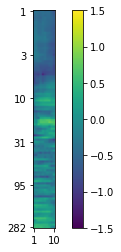

date:180401, rec:001, time:2629.0, label:1.0
date:180413, rec:002, time:690.0, label:0.0


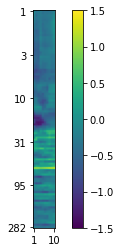

date:180413, rec:004, time:3414.0, label:1.0
date:180414, rec:002, time:4891.0, label:1.0
date:180413, rec:001, time:2480.0, label:0.0


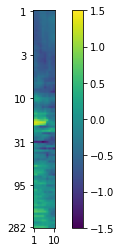

date:180413, rec:001, time:4662.0, label:0.0


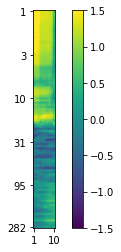

date:180414, rec:001, time:3884.0, label:0.0


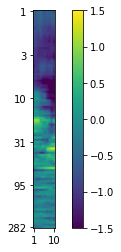

date:180414, rec:007, time:4157.0, label:0.0


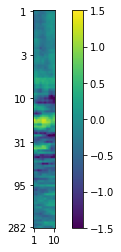

date:180327, rec:007, time:3460.0, label:0.0


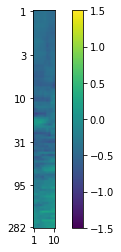

date:180325, rec:007, time:6673.0, label:0.0


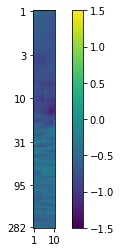

date:180327, rec:008, time:5899.0, label:1.0
date:180410, rec:006, time:5522.0, label:0.0


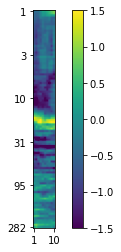

date:180322, rec:007, time:3359.0, label:0.0


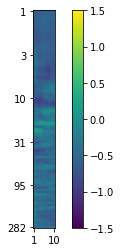

date:180413, rec:001, time:2120.0, label:0.0


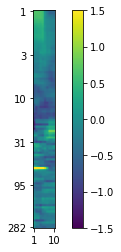

date:180412, rec:002, time:2787.0, label:1.0
date:180325, rec:002, time:3889.0, label:0.0


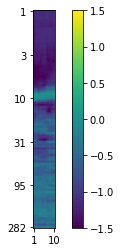

date:180325, rec:007, time:6103.0, label:0.0


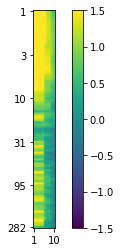

date:180414, rec:005, time:6169.0, label:1.0
date:180410, rec:006, time:5156.0, label:1.0
date:180411, rec:006, time:1201.0, label:1.0
date:180414, rec:002, time:5226.0, label:1.0
date:180325, rec:004, time:1548.0, label:1.0
date:180324, rec:003, time:1146.0, label:1.0


In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

In [6]:
class MLP(nn.Module): # add dropo
    def __init__(self, input_dim=100*10*62, output_dim=1, embed_dim=256,drop_prob=0.):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_dim, embed_dim)
        self.linear2 = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(drop_prob)
        
    def forward(self, x):
        
        x = x.reshape([x.shape[0], 1, -1]).float()
        x = self.dropout(F.relu(self.linear1(x)))
        outputs = self.linear2(x)
        
        return outputs

In [7]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'MLP'
loss_type = 'bce'
reg_type = 'none'
input_dim = 1*10*100
embed_dim = 256
p = 0.3


model = MLP(input_dim=input_dim, embed_dim=embed_dim,drop_prob = p).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model

MLP(
  (linear1): Linear(in_features=1000, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [8]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output = model(data)
output.shape

torch.Size([128, 1, 1])

In [9]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                  reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, 
                                 reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
                save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, epoch,model_name))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.351899653673172
Val loss for epoch 0: 0.3957056403160095
Train loss for epoch 1: 0.27156922221183777
Val loss for epoch 1: 0.3769230544567108
1
Train loss for epoch 2: 0.24207201600074768
Val loss for epoch 2: 0.36332106590270996
2
Train loss for epoch 3: 0.21838857233524323
Val loss for epoch 3: 0.3081541061401367
3
Train loss for epoch 4: 0.20384779572486877
Val loss for epoch 4: 0.2984539270401001
4
Train loss for epoch 5: 0.18782559037208557
Val loss for epoch 5: 0.30630090832710266
Train loss for epoch 6: 0.18379166722297668
Val loss for epoch 6: 0.327230304479599
Train loss for epoch 7: 0.17364077270030975
Val loss for epoch 7: 0.3217945098876953
Train loss for epoch 8: 0.16742826998233795
Val loss for epoch 8: 0.29752615094184875
8
Train loss for epoch 9: 0.160391166806221
Val loss for epoch 9: 0.3262101709842682
Train loss for epoch 10: 0.15761692821979523
Val loss for epoch 10: 0.3297211527824402
Train loss for epoch 11: 0.15439487993717194
Val loss f

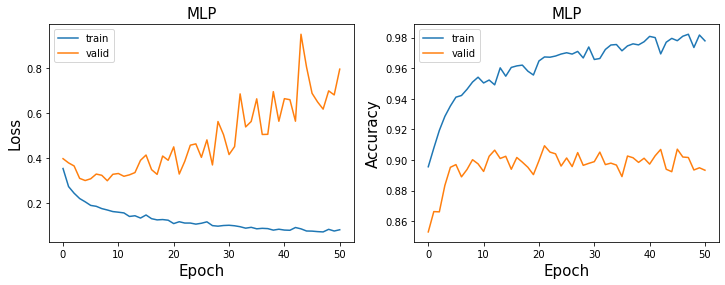

In [10]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # embed_dim=64

In [11]:
model = MLP(input_dim=input_dim, embed_dim=embed_dim).to(device)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EMBED{}_EPOCH{}_MODEL_{}.pt'.format(
    save_path, model_type, CH, loss_type, reg_type, alpha, embed_dim, best_epoch,model_name)))

<All keys matched successfully>

In [34]:
w1 = model.linear1.weight.view(256,10,100)
w2 = model.linear2.weight
print(w1.shape, w2.shape)
w1 = w1.detach().cpu().numpy()
w2 = w2.detach().cpu().numpy()
w1[0].shape
type(w1)

torch.Size([256, 10, 100]) torch.Size([1, 256])


numpy.ndarray

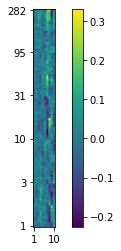

In [43]:
plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
plt.xticks(ticks=[0, 9], labels=[1, 10])
plt.imshow(w1[1].transpose(),origin='lower')
# plt.clim(-1.5, 1.5)
plt.colorbar()
plt.show()

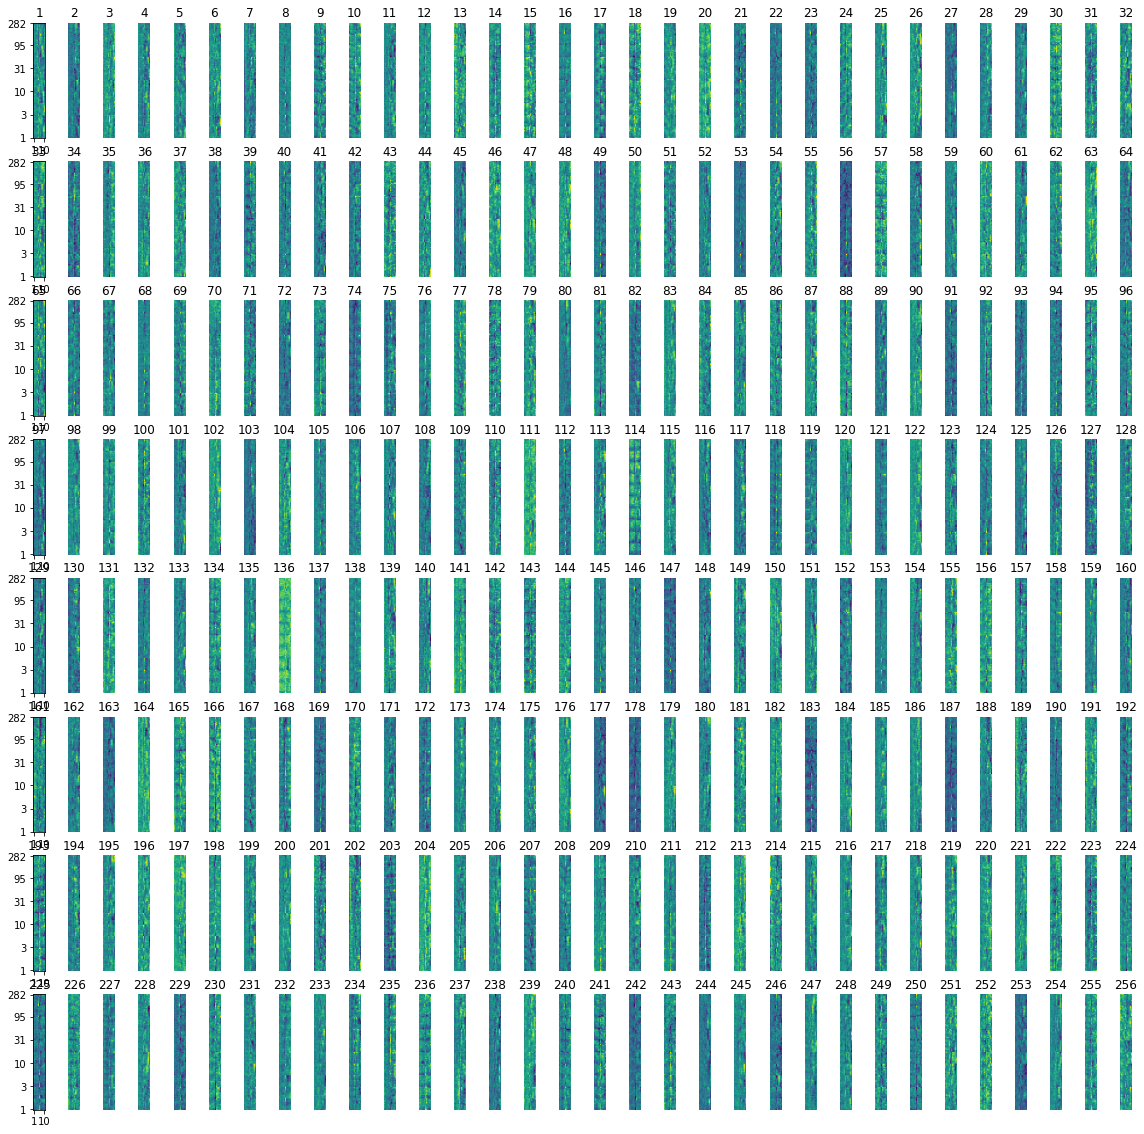

In [68]:
timewindow = 10
plt.figure(figsize=(20,20))
ylabels_list = [0,32,64,96,128,160,192,224,256] 
for i in range(256):
    weights_sub = w1[i]
    plt.subplot(8,32,i+1)
    if i in ylabels_list:
        plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
        plt.xticks(ticks=[0, timewindow-1], labels=[1, timewindow])
    else:
        plt.axis('off')
#     plt.imshow(weights_sub)
    plt.imshow(w1[i].transpose(),origin='lower')
    plt.title(str(i+1))
plt.show()

In [69]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.16502971947193146 accuracy:0.9600608596424496


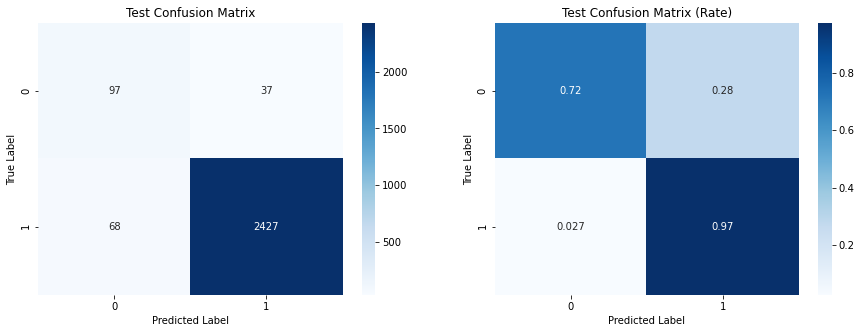

In [70]:
plot_confusion(test_preds, test_labels)